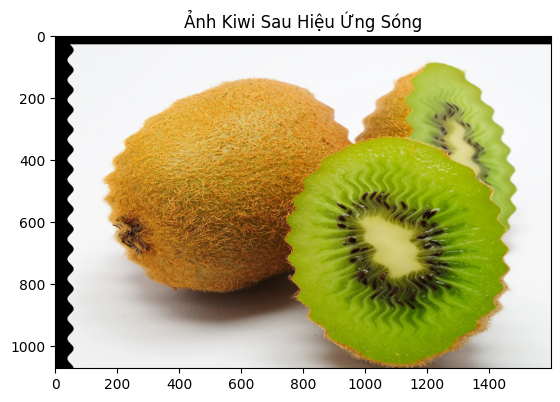

In [1]:
from PIL import Image
import numpy as np
from scipy.ndimage import map_coordinates
import math
import matplotlib.pyplot as plt  # <== Bổ sung dòng này

# Mở ảnh kiwi
img = Image.open("kiwi.jpg").convert("RGB")
img_np = np.array(img)

# Tịnh tiến ảnh 50 phải, 30 xuống
translated = np.zeros_like(img_np)
translated[30:, 50:] = img_np[:-30, :-50]

# Hiệu ứng sóng
rows, cols, _ = translated.shape
coords = np.meshgrid(np.arange(cols), np.arange(rows))
coords_x = coords[0] + 10 * np.sin(2 * np.pi * coords[1] / 64)
coords_y = coords[1]

wave_img = np.zeros_like(translated)
for i in range(3):
    wave_img[..., i] = map_coordinates(translated[..., i], [coords_y, coords_x], order=1, mode='reflect')

Image.fromarray(wave_img).save("kiwi_wave.jpg")

# Hiển thị ảnh đã áp dụng hiệu ứng sóng
plt.imshow(wave_img)
plt.title("Ảnh Kiwi Sau Hiệu Ứng Sóng")
plt.axis('on')  # Hiện trục tọa độ
plt.show()


Ảnh đu đủ gốc:
Kích thước: (1000, 1000)
Định dạng: None
Chế độ: RGBA

Ảnh dưa hấu gốc:
Kích thước: (500, 500)
Định dạng: None
Chế độ: RGBA

Ảnh kết quả (papaya_watermelon_gradient.png):
Kích thước: (2000, 1000)
Định dạng: PNG
Chế độ: RGBA


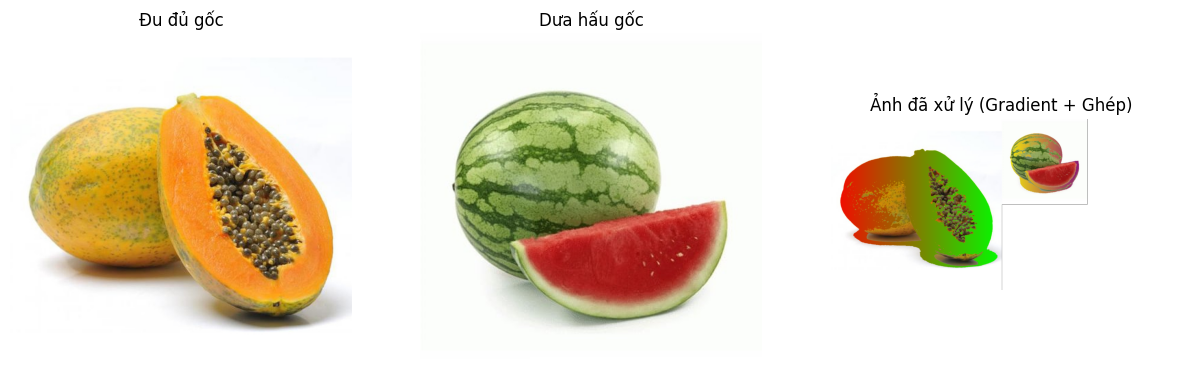

In [55]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh đu đủ và dưa hấu (thay bằng đường dẫn ảnh bạn tải)
papaya = Image.open("papaya.png").convert("RGBA")
watermelon = Image.open("watermelon.png").convert("RGBA")

# In thông tin ảnh gốc
print("Ảnh đu đủ gốc:")
print(f"Kích thước: {papaya.size}")
print(f"Định dạng: {papaya.format}")
print(f"Chế độ: {papaya.mode}")
print("\nẢnh dưa hấu gốc:")
print(f"Kích thước: {watermelon.size}")
print(f"Định dạng: {watermelon.format}")
print(f"Chế độ: {watermelon.mode}")

# Hàm tạo mặt nạ cho phần thịt của quả
def create_mask(img, lower_threshold, upper_threshold):
    img_array = np.array(img)
    # Chuyển sang không gian màu RGB trung bình
    gray = np.mean(img_array[:, :, :3], axis=2)
    # Tạo mặt nạ dựa trên ngưỡng màu (tùy chỉnh cho phần thịt)
    mask = (gray > lower_threshold) & (gray < upper_threshold)
    return mask

# Hàm áp dụng gradient chỉ lên vùng được chọn
def apply_gradient(img, color_start, color_end, lower_threshold, upper_threshold):
    img_array = np.array(img)
    mask = create_mask(img, lower_threshold, upper_threshold)
    height, width = img_array.shape[:2]
    # Tạo gradient tuyến tính từ 0 đến 1 theo chiều ngang
    gradient = np.linspace(0, 1, width).reshape(1, width, 1)
    gradient = np.repeat(gradient, height, axis=0)
    # Màu bắt đầu và kết thúc
    color_start = np.array(color_start)  # RGB
    color_end = np.array(color_end)      # RGB
    # Tính toán màu gradient
    new_colors = (1 - gradient) * color_start + gradient * color_end
    # Áp dụng gradient chỉ lên vùng được chọn
    result = img_array.copy()
    for c in range(3):  # Chỉ áp dụng lên kênh RGB
        result[:, :, c] = np.where(mask, new_colors[:, :, c], img_array[:, :, c])
    return Image.fromarray(result)

# Áp dụng gradient chỉ lên phần thịt
# Đu đủ: phần thịt màu cam (ngưỡng 120-220), đỏ -> xanh lá
papaya_grad = apply_gradient(papaya, (255, 0, 0), (0, 255, 0), 120, 220)
# Dưa hấu: phần thịt màu đỏ (ngưỡng 150-240), vàng -> tím
watermelon_grad = apply_gradient(watermelon, (255, 255, 0), (128, 0, 128), 150, 240)

# Ghép hai ảnh trên nền trong suốt
canvas_width = max(papaya_grad.size[0], watermelon_grad.size[0]) * 2
canvas_height = max(papaya_grad.size[1], watermelon_grad.size[1])
canvas = Image.new("RGBA", (canvas_width, canvas_height), (0, 0, 0, 0))
canvas.paste(papaya_grad, (0, 0))
canvas.paste(watermelon_grad, (papaya_grad.size[0], 0))

# Lưu ảnh kết quả
canvas.save("papaya_watermelon_gradient.png")

# In thông tin ảnh kết quả
print("\nẢnh kết quả (papaya_watermelon_gradient.png):")
print(f"Kích thước: {canvas.size}")
print(f"Định dạng: PNG")
print(f"Chế độ: {canvas.mode}")

# Hiển thị ảnh gốc và ảnh đã xử lý
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Đu đủ gốc")
plt.imshow(papaya)
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title("Dưa hấu gốc")
plt.imshow(watermelon)
plt.axis("off")
plt.subplot(1, 3, 3)
plt.title("Ảnh đã xử lý (Gradient + Ghép)")
plt.imshow(canvas)
plt.axis("off")
plt.show()

Ảnh núi gốc:
Kích thước: (2000, 1333)
Định dạng: None
Chế độ: RGB

Ảnh thuyền gốc:
Kích thước: (1600, 1066)
Định dạng: None
Chế độ: RGB

Ảnh kết quả (mountain_boat_mirror.jpg):
Kích thước: (4000, 1333)
Định dạng: JPEG
Chế độ: RGB


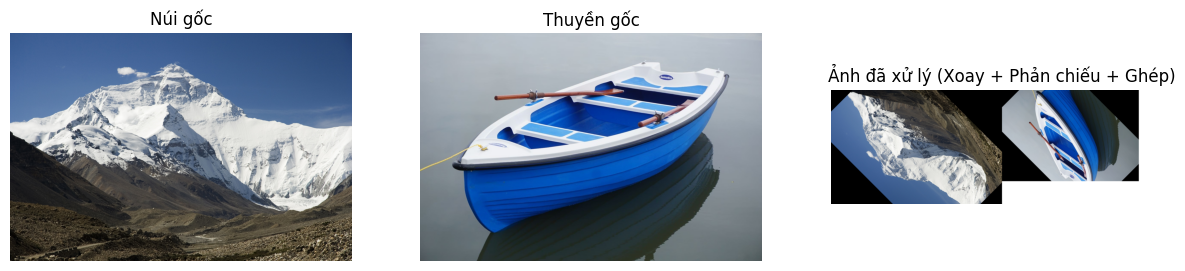

In [56]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh núi và thuyền (thay bằng đường dẫn ảnh bạn tải)
mountain = Image.open("mountain.jpg").convert("RGB")
boat = Image.open("boat.jpg").convert("RGB")

# In thông tin ảnh gốc trong console
print("Ảnh núi gốc:")
print(f"Kích thước: {mountain.size}")
print(f"Định dạng: {mountain.format}")
print(f"Chế độ: {mountain.mode}")
print("\nẢnh thuyền gốc:")
print(f"Kích thước: {boat.size}")
print(f"Định dạng: {boat.format}")
print(f"Chế độ: {boat.mode}")

# Xoay 45 độ, giữ kích thước ban đầu (reshape=False)
mountain_rotated = mountain.rotate(45, expand=False)
boat_rotated = boat.rotate(45, expand=False)

# Tạo hiệu ứng phản chiếu dọc (vertical mirror)
mountain_mirror = mountain_rotated.transpose(Image.FLIP_TOP_BOTTOM)
boat_mirror = boat_rotated.transpose(Image.FLIP_TOP_BOTTOM)

# Ghép hai ảnh lên canvas trắng
# Tính kích thước canvas dựa trên ảnh lớn nhất sau khi xoay
canvas_width = max(mountain_mirror.size[0], boat_mirror.size[0]) * 2
canvas_height = max(mountain_mirror.size[1], boat_mirror.size[1])
canvas = Image.new("RGB", (canvas_width, canvas_height), (255, 255, 255))  # Nền trắng
canvas.paste(mountain_mirror, (0, 0))
canvas.paste(boat_mirror, (mountain_mirror.size[0], 0))

# Lưu ảnh kết quả
canvas.save("mountain_boat_mirror.jpg")

# In thông tin ảnh kết quả
print("\nẢnh kết quả (mountain_boat_mirror.jpg):")
print(f"Kích thước: {canvas.size}")
print(f"Định dạng: JPEG")
print(f"Chế độ: {canvas.mode}")

# Hiển thị ảnh gốc và ảnh đã xử lý
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Núi gốc")
plt.imshow(mountain)
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title("Thuyền gốc")
plt.imshow(boat)
plt.axis("off")
plt.subplot(1, 3, 3)
plt.title("Ảnh đã xử lý (Xoay + Phản chiếu + Ghép)")
plt.imshow(canvas)
plt.axis("off")
plt.show()

Ảnh chùa gốc:
Kích thước: (1200, 900)
Định dạng: None
Chế độ: RGB

Ảnh kết quả (pagoda_warped.jpg):
Kích thước: (6000, 4500)
Định dạng: JPEG
Chế độ: RGB


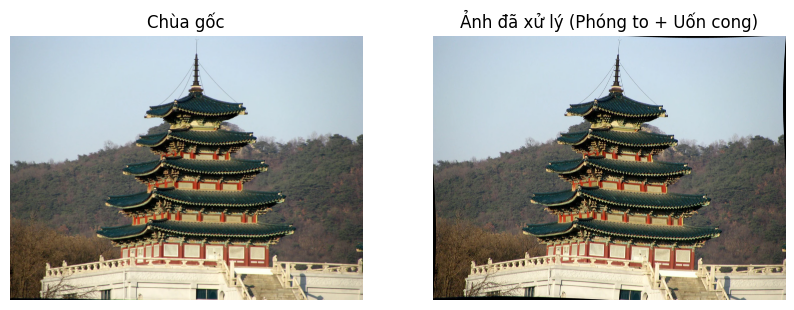

In [57]:
from PIL import Image
import numpy as np
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt

# Đọc ảnh chùa (thay bằng đường dẫn ảnh bạn tải)
pagoda = Image.open("pagoda.jpg").convert("RGB")

# In thông tin ảnh gốc trong console
print("Ảnh chùa gốc:")
print(f"Kích thước: {pagoda.size}")
print(f"Định dạng: {pagoda.format}")
print(f"Chế độ: {pagoda.mode}")

# Phóng to 5 lần
new_size = (pagoda.size[0] * 5, pagoda.size[1] * 5)
pagoda_scaled = pagoda.resize(new_size, Image.LANCZOS)

# Áp dụng hiệu ứng uốn cong (warping) bằng biến đổi tọa độ
img_array = np.array(pagoda_scaled)
height, width = img_array.shape[:2]
y, x = np.indices((height, width))
# Tạo hiệu ứng uốn cong bằng hàm sin
warp_x = x + 50 * np.sin(2 * np.pi * y / height)  # Uốn dọc
warp_y = y + 50 * np.sin(2 * np.pi * x / width)   # Uốn ngang
coords = np.stack([warp_y, warp_x], axis=-1)

# Biến đổi tọa độ với map_coordinates
warped = np.zeros_like(img_array)
for c in range(img_array.shape[2]):
    warped[:, :, c] = map_coordinates(img_array[:, :, c], coords.transpose(2, 0, 1), order=1)

# Lưu ảnh kết quả
result = Image.fromarray(warped.astype(np.uint8))
result.save("pagoda_warped.jpg")

# In thông tin ảnh kết quả
print("\nẢnh kết quả (pagoda_warped.jpg):")
print(f"Kích thước: {result.size}")
print(f"Định dạng: JPEG")
print(f"Chế độ: {result.mode}")

# Hiển thị ảnh gốc và ảnh đã xử lý
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Chùa gốc")
plt.imshow(pagoda)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Ảnh đã xử lý (Phóng to + Uốn cong)")
plt.imshow(result)
plt.axis("off")
plt.show()

Chọn ảnh:
1. kiwi.jpg
2. pagoda.jpg
3. mountain.jpg

Ảnh gốc:
Kích thước: (1600, 1071)
Định dạng: None
Chế độ: RGB

Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to/thu nhỏ
4. Làm mờ Gaussian
5. Biến đổi sóng
6. Thoát


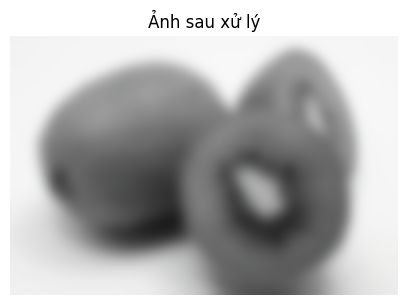


Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to/thu nhỏ
4. Làm mờ Gaussian
5. Biến đổi sóng
6. Thoát


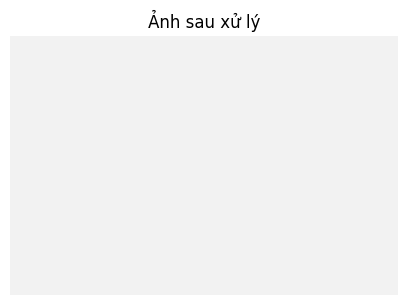


Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to/thu nhỏ
4. Làm mờ Gaussian
5. Biến đổi sóng
6. Thoát
Lỗi không xác định: 

Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to/thu nhỏ
4. Làm mờ Gaussian
5. Biến đổi sóng
6. Thoát


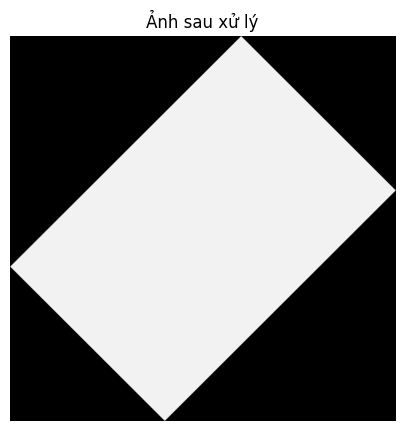


Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to/thu nhỏ
4. Làm mờ Gaussian
5. Biến đổi sóng
6. Thoát


In [ ]:
from PIL import Image
import numpy as np
from scipy.ndimage import map_coordinates, gaussian_filter
import matplotlib.pyplot as plt

# Các hàm xử lý ảnh được tối ưu
def translate_image(img, dx, dy):
    img_array = np.array(img)
    height, width = img_array.shape[:2]
    # Tạo lưới tọa độ mới với dịch chuyển
    y, x = np.indices((height, width))
    new_y = np.clip(y - dy, 0, height - 1)
    new_x = np.clip(x - dx, 0, width - 1)
    # Áp dụng dịch chuyển bằng cách lấy giá trị từ tọa độ mới
    translated = img_array[new_y, new_x]
    return Image.fromarray(translated.astype(np.uint8))

def rotate_image(img, angle, reshape):
    try:
        return img.rotate(angle, expand=reshape)
    except Exception as e:
        print(f"Lỗi khi xoay ảnh: {e}")
        return img

def scale_image(img, factor):
    if not isinstance(factor, (int, float)) or factor <= 0:
        print("Hệ số phóng to/thu nhỏ phải là số lớn hơn 0. Sử dụng giá trị mặc định 1.")
        factor = 1
    new_size = (int(img.size[0] * factor), int(img.size[1] * factor))
    return img.resize(new_size, Image.LANCZOS)

def gaussian_blur(img, sigma):
    if not isinstance(sigma, (int, float)) or sigma < 0:
        print("Giá trị sigma phải là số không âm. Sử dụng giá trị mặc định 1.")
        sigma = 1
    img_array = np.array(img)
    try:
        blurred = gaussian_filter(img_array, sigma=sigma)
        return Image.fromarray(np.clip(blurred, 0, 255).astype(np.uint8))
    except Exception as e:
        print(f"Lỗi khi làm mờ: {e}")
        return img

def wave_effect(img, amplitude):
    if not isinstance(amplitude, (int, float)) or amplitude < 0:
        print("Biên độ sóng phải là số không âm. Sử dụng giá trị mặc định 10.")
        amplitude = 10
    img_array = np.array(img)
    height, width = img_array.shape[:2]
    y, x = np.indices((height, width))
    # Tối ưu bằng cách sử dụng lưới tọa độ
    wave_x = x + amplitude * np.sin(2 * np.pi * y / 128)
    wave_y = y + amplitude * np.sin(2 * np.pi * x / 128)
    coords = np.stack([wave_y, wave_x], axis=-1)
    try:
        warped = np.zeros_like(img_array)
        for c in range(img_array.shape[2]):
            warped[:, :, c] = map_coordinates(img_array[:, :, c], coords.transpose(1, 0), order=1, mode='nearest')
        return Image.fromarray(warped.astype(np.uint8))
    except Exception as e:
        print(f"Lỗi khi áp dụng hiệu ứng sóng: {e}")
        return img

# Menu tương tác
images = ["kiwi.jpg", "pagoda.jpg", "mountain.jpg"]  # Thay bằng tên file ảnh bạn chọn
print("Chọn ảnh:")
for i, img_path in enumerate(images, 1):
    print(f"{i}. {img_path}")

while True:
    try:
        choice = int(input("Nhập số thứ tự ảnh (1-3): ")) - 1
        if 0 <= choice < len(images):
            try:
                img = Image.open(images[choice]).convert("RGB")
                break
            except FileNotFoundError:
                print(f"File {images[choice]} không tồn tại. Vui lòng kiểm tra lại.")
        else:
            print("Số thứ tự không hợp lệ. Vui lòng chọn từ 1 đến 3.")
    except ValueError:
        print("Vui lòng nhập một số nguyên.")

# In thông tin ảnh gốc
print("\nẢnh gốc:")
print(f"Kích thước: {img.size}")
print(f"Định dạng: {img.format}")
print(f"Chế độ: {img.mode}")

while True:
    print("\nChọn phép biến đổi:")
    print("1. Tịnh tiến")
    print("2. Xoay")
    print("3. Phóng to/thu nhỏ")
    print("4. Làm mờ Gaussian")
    print("5. Biến đổi sóng")
    print("6. Thoát")
    
    try:
        choice = int(input("Nhập lựa chọn (1-6): "))
        if choice == 6:
            break
        elif choice not in range(1, 7):
            print("Lựa chọn không hợp lệ. Vui lòng chọn từ 1 đến 6.")
            continue

        if choice == 1:
            dx = int(input("Nhập số pixel tịnh tiến theo x: "))
            dy = int(input("Nhập số pixel tịnh tiến theo y: "))
            img = translate_image(img, dx, dy)
        elif choice == 2:
            angle = float(input("Nhập góc xoay (độ): "))
            reshape = input("Giữ kích thước ban đầu? (True/False): ").strip().lower() == "true"
            img = rotate_image(img, angle, reshape)
        elif choice == 3:
            factor = float(input("Nhập hệ số phóng to/thu nhỏ: "))
            img = scale_image(img, factor)
        elif choice == 4:
            sigma = float(input("Nhập giá trị sigma cho làm mờ: "))
            img = gaussian_blur(img, sigma)
        elif choice == 5:
            amplitude = float(input("Nhập biên độ sóng: "))
            img = wave_effect(img, amplitude)

        # Hiển thị ảnh sau mỗi lần xử lý
        plt.figure(figsize=(5, 5))
        plt.title("Ảnh sau xử lý")
        plt.imshow(img)
        plt.axis("off")
        plt.show()

    except ValueError:
        print("Vui lòng nhập một số hợp lệ.")
    except Exception as e:
        print(f"Lỗi không xác định: {e}")

# Lưu ảnh cuối cùng
try:
    img.save("transformed_image.jpg")
    print("\nẢnh kết quả (transformed_image.jpg):")
    print(f"Kích thước: {img.size}")
    print(f"Định dạng: JPEG")
    print(f"Chế độ: {img.mode}")
except Exception as e:
    print(f"Lỗi khi lưu ảnh: {e}")